<h1 style="text-align: center;">A Data Mining Approach to Predict Forest Fires using Meteorological Data</h1> 

##### Forest fires, sometimes known as wildfires, are a serious environmental concern as they harm forests, cause economic and ecological damage, and cause pain for humans. Every year, millions of hectares (ha) of forest are destroyed worldwide owing to a variety of causes, including human irresponsibility and lightning. Despite increased public spending to control the disaster, this phenomena continues to occur. Portugal is particularly vulnerable to forest fires. From 1980 to 2005, nearly 2.7 million acres of forest (equal to Albania's geographical area) were lost. The 2003 and 2005 fire seasons were particularly devastating, affecting 4.6% and 3.1% of the territory, respectively, resulting in 21 and 18 human deaths.Fast detection is essential for successful firefighting. Because traditional human surveillance is expensive and influenced by subjective factors, there has been a push to develop automated solutions. These are divided into three categories: satellite-based, infrared/smoke scanners, and local sensors (for example, meteorological). Satellites have acquisition costs, localization delays, and their resolution is insufficient for View metadata, citations, and related publications at core.ac.uk, brought to you by CORE and hosted by Universidade do Minho: RepositoriUM in all situations. Furthermore, scanners incur expensive equipment and maintenance costs. Weather variables, such as temperature and humidity, are known to influence fire occurrence. Because automatic meteorological stations are frequently available (Portugal has 162 official stations), such data can be obtained in real time.Unlike the rest, the appeal in Data Mining, doing Knowledge Discovery in Databases, captivated the audience owing to the growth of Information Technology, which led to a dramatic growth of business, scientific and engineering databases. All this information contains useful knowledge such as patterns, and relationships that assist in effective decision making. Humans on the other hand, are bounded and can overlook important aspects. Even more than this, traditional statistical analysis meets its limits where, for example, big and/or intricate data is present. In this context, the readable answer is to use automated tools of DM to handle extensive amounts of source data in order to produce information useful to the decision maker. Of course, It is beyond any doubt that some of the methods of artificial intelligence have also been used in the field of fire detection. For example, it was noted that Vega-Garcia et, al, neural network NN was used in analysis of wildfire instigated by people . In the works of LASEDEVA et. al, for forest fire detection, there was a merger of infrared cameras and neural network systems and out of 10 false fires only 1 was not put out. Hsu et al.further developed techniques with the use of satellite images to automatically locate forest fires using FASTCiD. In 2005 there was an attempt by ARNAEUS et al. to analyze the burning of forests in America with the help of a support vector machine SVM and in the region of several pixels measuring 1.1 km by 75 percent accuracy were discovered smoke.Stojanova et al have employed Logistic Regression, Random Forest, and Decision Trees for a risk analysis of fire events in the Slovenian forests while incorporating satellite and weather data into their models. Bagging Decision Tree turned out to be the best model with an 80% accuracy level. We have developed a new approach to collecting DM forest fire data that improves upon existing approaches that rely on expensive meteorological information. The motivation of this Pardi project is to develop a model that nowadays slightly larger, that burns relatively larger areas, and for this we will use realistic and extensive geo-referenced data collected over a large area in the northeastern region of Portugal. A total of five DM techniques (multiple regression, DT, RF, NN and SVM) and four feature selection approaches (spatial, temporal, FWI and meteorological data) were utilized during the experiments. SVM with only four weather variables including rain, wind, temperature and dew point which is able to estimate the burned area of small fires which accounts for most of the fires. This kind of understanding is very important for decision-making processes related to fire management strategy planning and resource management.





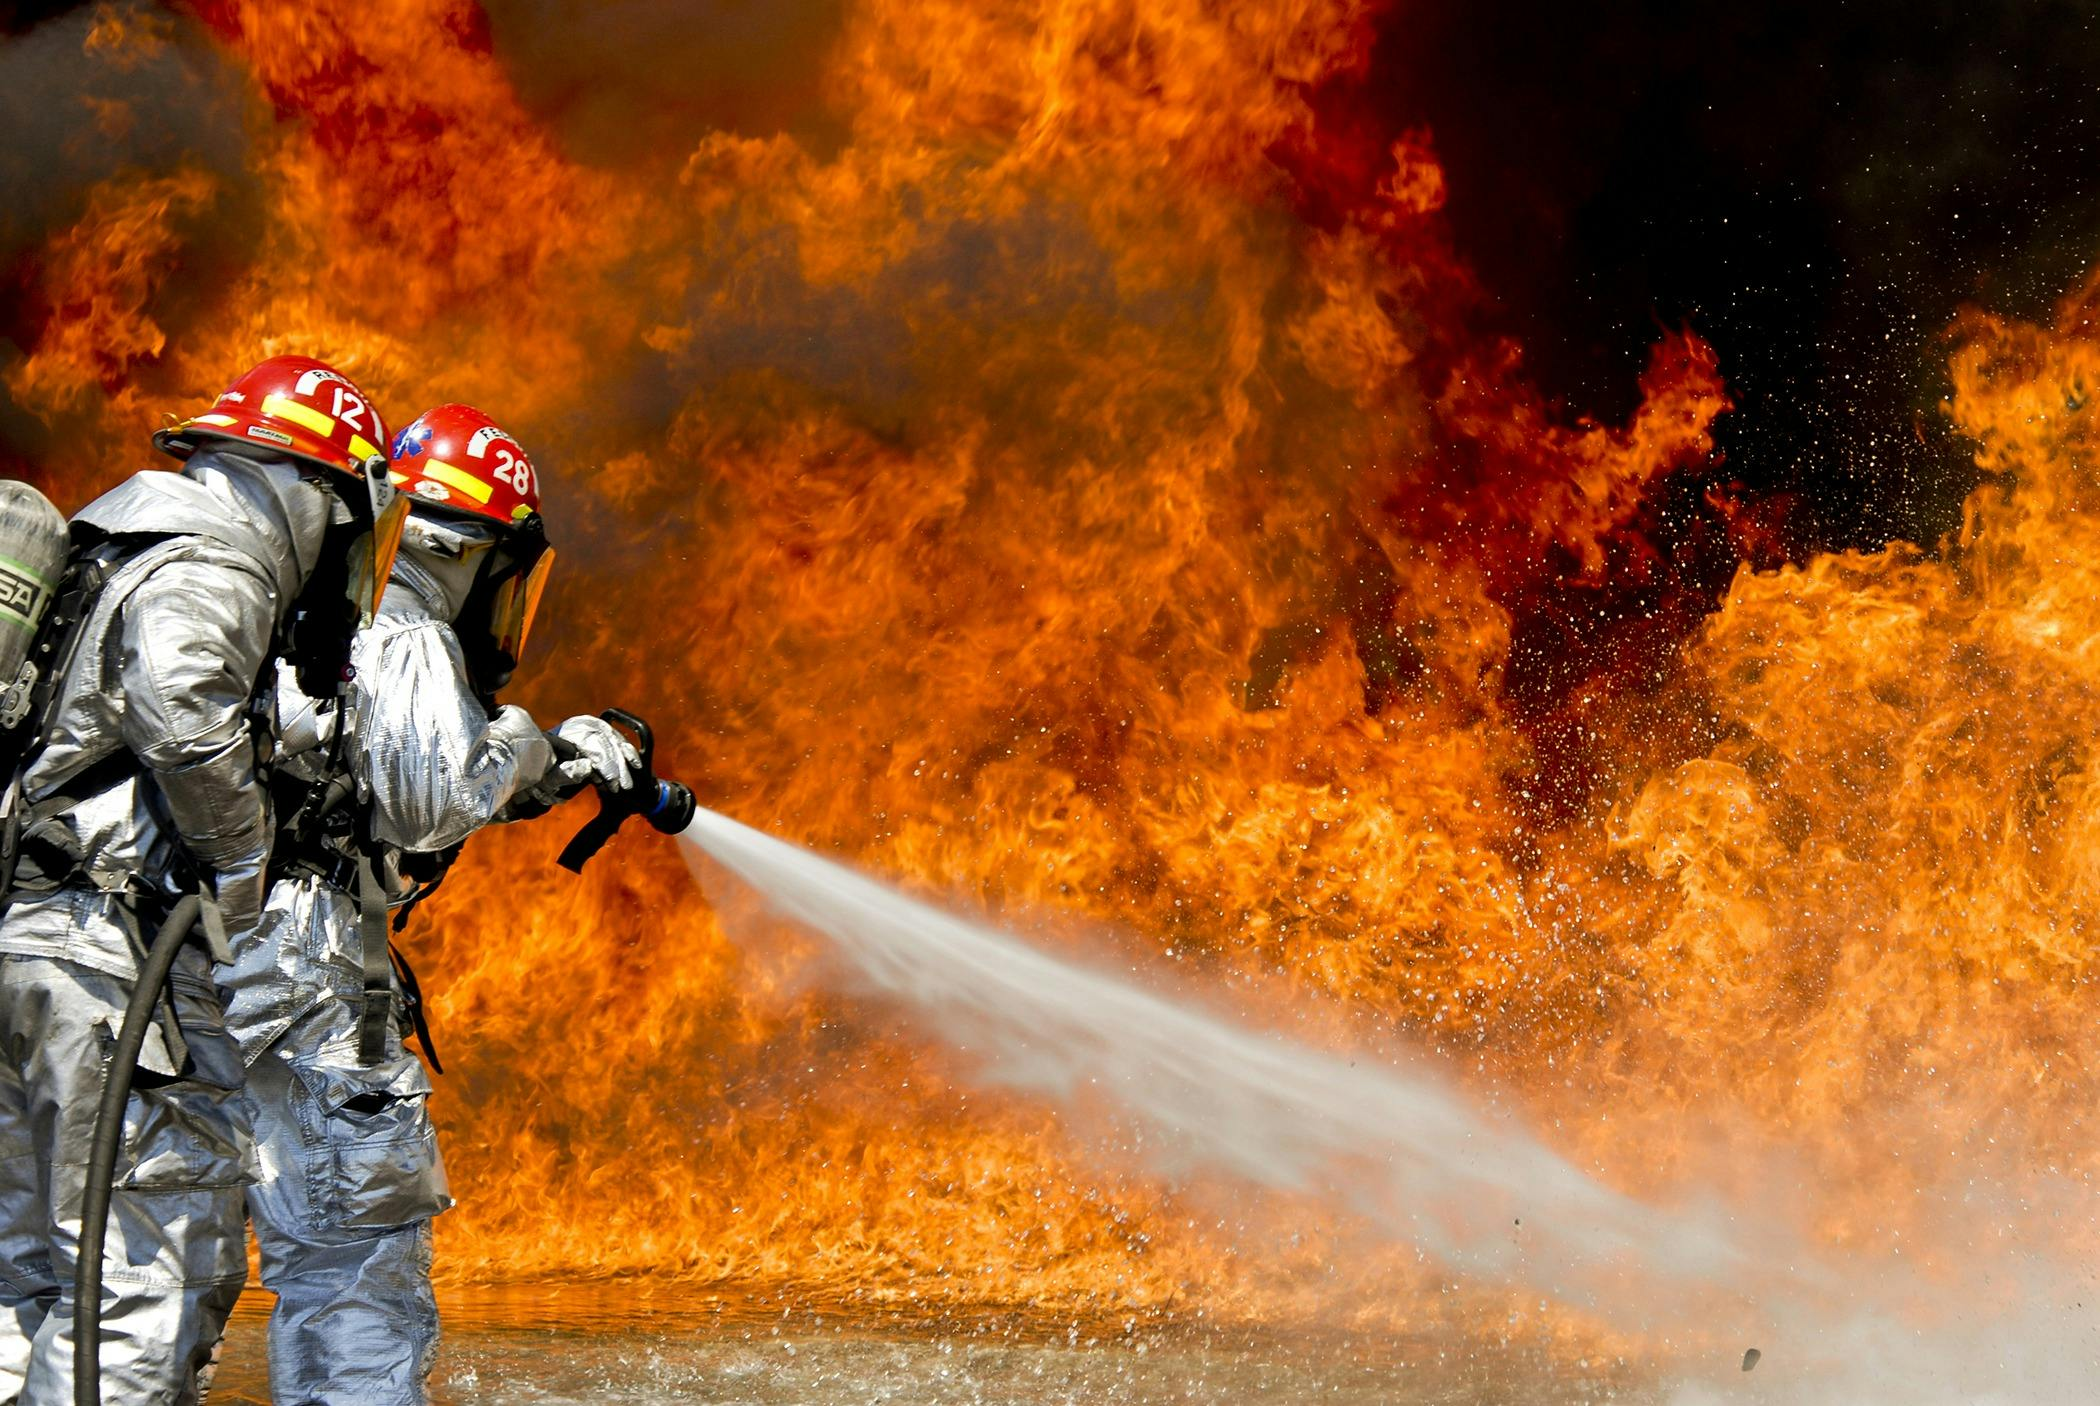

In [3]:
from IPython.display import Image

# Provide the path to your image in Downloads folder
image_path = '/Users/tusharbhalerao/Downloads/pexels-pixabay-69934.jpg'

# Display the image
Image(filename=image_path)

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [21]:
print(forest_fires.variables)

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

In [23]:
print(forest_fires)

{'data': {'ids': None, 'features':      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns], 'targets':       area
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
..     ...
512   6.44
513  54.29
5

In [31]:
# Try escaping the plus symbol
file_path = '/Users/tusharbhalerao/Downloads/forestfires.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [33]:
df 

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [35]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [37]:
df.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

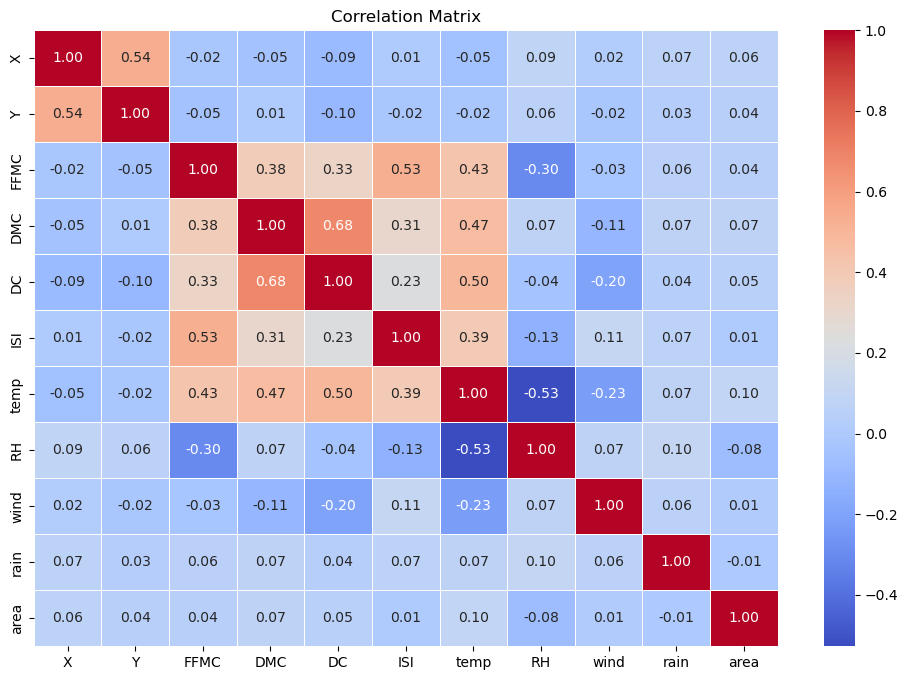

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64


In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize it using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Specifically check the correlation between features and the target 'area'
print(correlation_matrix['area'].sort_values(ascending=False))

In [45]:
# Check the column names
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [49]:
# Binning temperature into categories: cold, moderate, hot
bins = [-float('inf'), 10, 20, float('inf')]  # Define temperature ranges
labels = ['cold', 'moderate', 'hot']
df['temp_bin'] = pd.cut(df['temp'], bins=bins, labels=labels)

# Create interaction features (Example: temp * wind, ISI * DMC)
df['temp_wind_interaction'] = df['temp'] * df['wind']
df['ISI_DMC_interaction'] = df['ISI'] * df['DMC']

# Check the updated dataframe
df

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     temp_bin  temp_wind_interaction  ISI_DMC_interaction  
0        cold                  54.94               133.62  
1    moderate                  16.20               237.18  
2    moderate                  18.98               292.79  
3        cold                  33.20               299.70  
4    moderate                  20.52               492.48  
..        ...                    ...                  ...  
512       hot                  75.06               107.73  
513       hot                 127.02               107.73  
514       hot                 142.04               107.73  
515       hot                 102.40              1649.80  
516  moderate                  53.10                 3.30  

[517 rows x 16 columns]

In [71]:
# Check the columns of the dataframe
print(df.columns)

Index(['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'temp_bin', 'temp_wind_interaction',
       'ISI_DMC_interaction', 'FFMC_DC_interaction', 'log_area', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11'],
      dtype='object')


In [73]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for the 'temp_bin' column
label_encoder = LabelEncoder()

# Apply label encoding to 'temp_bin'
df['temp_bin'] = label_encoder.fit_transform(df['temp_bin'])

# Check the changes
print(df.head())

       X         Y  day      FFMC       DMC        DC       ISI      temp  \
0  0.750  0.428571  fri  0.870968  0.086492  0.101325  0.090909  0.192926   
1  0.750  0.285714  tue  0.927742  0.118194  0.775419  0.119430  0.508039   
2  0.750  0.285714  sat  0.927742  0.146795  0.796294  0.119430  0.398714   
3  0.875  0.571429  fri  0.941935  0.110958  0.081623  0.160428  0.196141   
4  0.875  0.571429  sun  0.910968  0.172984  0.110590  0.171123  0.295820   

         RH      wind  ...  month_2  month_3  month_4  month_5  month_6  \
0  0.423529  0.700000  ...    False    False    False    False    False   
1  0.211765  0.055556  ...    False    False    False    False    False   
2  0.211765  0.100000  ...    False    False    False    False    False   
3  0.964706  0.400000  ...    False    False    False    False    False   
4  0.988235  0.155556  ...    False    False    False    False    False   

   month_7  month_8  month_9  month_10  month_11  
0     True    False    False     Fa

In [77]:
# Define features and target variable
X = df.drop('area', axis=1)  # Features
y = df['area']  # Target variable (area of fire)

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting datasets
print(X_train.shape, X_test.shape)

(361, 27) (156, 27)


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2080.1056095697454
R-squared: 0.7386119059501586


In [81]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the new model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error (Best): {mse_best}')
print(f'R-squared (Best): {r2_best}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (Best): 3227.229282100947
R-squared (Best): 0.5944632295450187


In [85]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)

# Get the feature names (for sklearn >= 0.24)
poly_feature_names = poly.get_feature_names_out(X.columns)

# Convert the resulting polynomial features into a DataFrame
X_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Show the first few rows of the transformed features
print(X_poly.head())

     1      X         Y  day      FFMC       DMC        DC       ISI  \
0  1.0  0.750  0.428571  0.0  0.870968  0.086492  0.101325  0.090909   
1  1.0  0.750  0.285714  5.0  0.927742  0.118194  0.775419  0.119430   
2  1.0  0.750  0.285714  2.0  0.927742  0.146795  0.796294  0.119430   
3  1.0  0.875  0.571429  0.0  0.941935  0.110958  0.081623  0.160428   
4  1.0  0.875  0.571429  3.0  0.910968  0.172984  0.110590  0.171123   

       temp        RH  ...  month_8^2  month_8 month_9  month_8 month_10  \
0  0.192926  0.423529  ...        0.0              0.0               0.0   
1  0.508039  0.211765  ...        0.0              0.0               0.0   
2  0.398714  0.211765  ...        0.0              0.0               0.0   
3  0.196141  0.964706  ...        0.0              0.0               0.0   
4  0.295820  0.988235  ...        0.0              0.0               0.0   

   month_8 month_11  month_9^2  month_9 month_10  month_9 month_11  \
0               0.0        0.0          

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df is your original DataFrame

# Step 1: Encode categorical variables (e.g., 'day' column)
# OneHotEncoder will create a separate column for each unique value in 'day'
encoder = OneHotEncoder(drop='first', sparse_output=False)
day_encoded = encoder.fit_transform(df[['day']])

# Convert the encoded 'day' back to a DataFrame
day_encoded_df = pd.DataFrame(day_encoded, columns=encoder.get_feature_names_out(['day']))

# Step 2: Polynomial feature generation for numeric columns (excluding 'day')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_columns])

# Get the names of the generated polynomial features
poly_feature_names = poly.get_feature_names_out(numeric_columns)

# Convert polynomial features into a DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Step 3: Combine the one-hot encoded 'day' with the polynomial features
df_transformed = pd.concat([df.drop(columns=numeric_columns + ['day']), poly_df, day_encoded_df], axis=1)

# Show the transformed DataFrame
print(df_transformed.head())

   month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0    False    False    False    False    False    False     True    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False     True    False   
4    False    False    False    False    False    False     True    False   

   month_9  month_10  ...  ISI_DMC_interaction log_area  \
0    False     False  ...                           0.0   
1    False      True  ...                           0.0   
2    False      True  ...                           0.0   
3    False     False  ...                           0.0   
4    False     False  ...                           0.0   

   FFMC_DC_interaction^2  FFMC_DC_interaction log_area  log_area^2  day_1  \
0           6.607511e+07                           0.0         0.0    0.0   
1           3.674840e+09    

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4232.600855585967
R-squared: 0.46812725977687986


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Output the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 9249.504656781322
R-squared: -0.16230175141986591


In [99]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Improved model with additional layers and dropout regularization
model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_improved.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))  # Output layer

# Compile the model with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
model_improved.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model_improved.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1554.9025 - val_loss: 8153.0127
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1350.0577 - val_loss: 8124.1216
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2295.2112 - val_loss: 8077.9663
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1394.5065 - val_loss: 8020.4341
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 974.1067 - val_loss: 7949.3901
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2132.6555 - val_loss: 7860.8726
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4877.9722 - val_loss: 7756.6650
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4892.3721 - val_loss: 7634.6665
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1922.8455 - val_loss: 7486.6177
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1785.5476 - val_loss: 7306.8389
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1079.3531 - val_loss: 7056.2437
Epoch 12/1

In [103]:
# Predict using the improved model
y_pred_improved = model_improved.predict(X_test_scaled)

# Calculate the Mean Squared Error and R-squared
from sklearn.metrics import mean_squared_error, r2_score

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Mean Squared Error: {mse_improved}")
print(f"Improved R-squared: {r2_improved}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Improved Mean Squared Error: 3663.313083261567
Improved R-squared: 0.5396645149475605


In [123]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow.keras.backend as K

# Custom accuracy function for regression
def regression_accuracy(y_true, y_pred, threshold=0.1):
    # Calculate absolute difference between true and predicted values
    diff = K.abs(y_true - y_pred)
    # Check how many predictions are within the threshold (e.g., 10% difference)
    accurate = K.cast(K.less(diff, threshold), K.floatx())
    return K.mean(accurate)

# Improved model with additional layers and dropout regularization
model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_improved.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))  # Output layer

# Compile the model with a learning rate scheduler and the custom accuracy metric
optimizer = Adam(learning_rate=0.001)
model_improved.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[regression_accuracy])

# Train the model
history = model_improved.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Accessing training and validation accuracy from history
train_acc = history.history['regression_accuracy']
val_acc = history.history['val_regression_accuracy']

# Print final accuracy (e.g., last epoch)
print(f"Final Training Accuracy: {train_acc[-1]}")
print(f"Final Validation Accuracy: {val_acc[-1]}")

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1894.1199 - regression_accuracy: 0.0641 - val_loss: 8169.8188 - val_regression_accuracy: 0.0063
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1905.1017 - regression_accuracy: 0.0197 - val_loss: 8138.9175 - val_regression_accuracy: 0.0196
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1429.8287 - regression_accuracy: 0.0176 - val_loss: 8101.3975 - val_regression_accuracy: 0.0000e+00
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1986.8004 - regression_accuracy: 0.0117 - val_loss: 8047.8950 - val_regression_accuracy: 0.0000e+00
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3852.3345 - regression_accuracy: 0.0027 - val_loss: 7978.5146 - val_regression_accuracy: 0.0000e+00
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1920.8641 - regression_accuracy: 0.0082 - val_loss: 7893.8076 - val_regression_accuracy: 0.0000e+00
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2457.4

In [125]:
# Assuming df is your dataframe
print(df.head())  # First few rows
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics of numeric columns

   day      FFMC       DMC        DC       ISI      temp        RH      wind  \
0    0  0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    5  0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    2  0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0  0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    3  0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   

      rain  area  ...  month_2  month_3  month_4  month_5  month_6  month_7  \
0  0.00000   0.0  ...    False    False    False    False    False     True   
1  0.00000   0.0  ...    False    False    False    False    False    False   
2  0.00000   0.0  ...    False    False    False    False    False    False   
3  0.03125   0.0  ...    False    False    False    False    False     True   
4  0.00000   0.0  ...    False    False    False    False    False     True   

   month_8  month_9  month_10  month_11  
0 

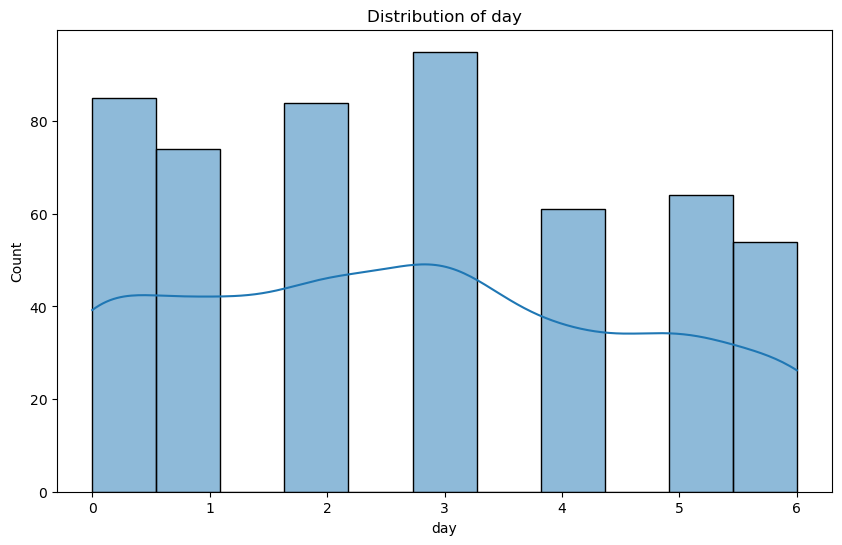

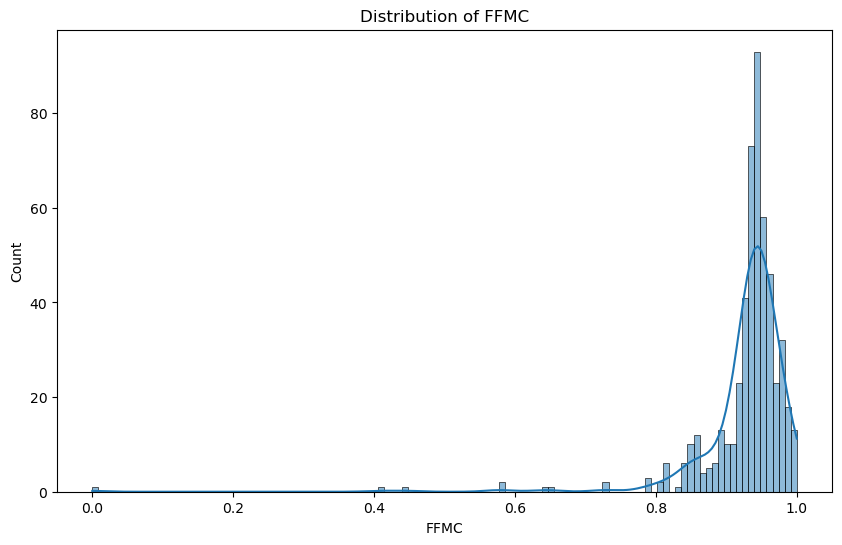

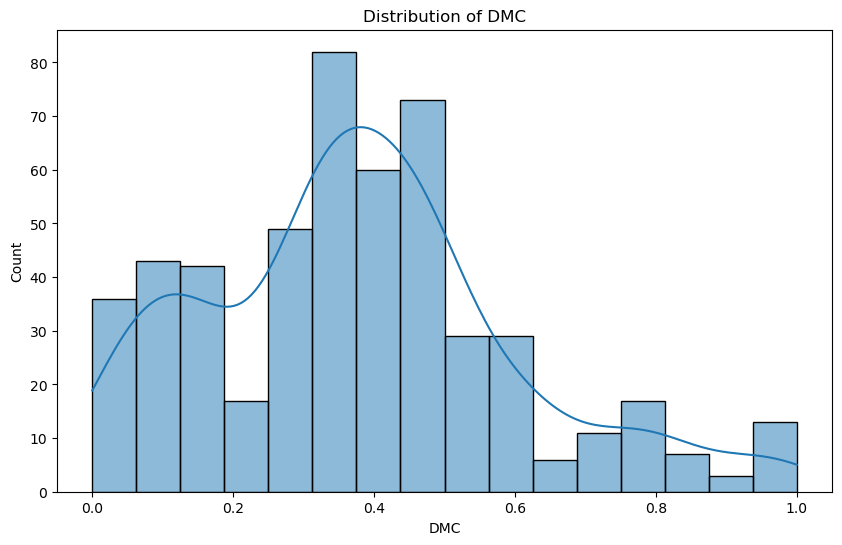

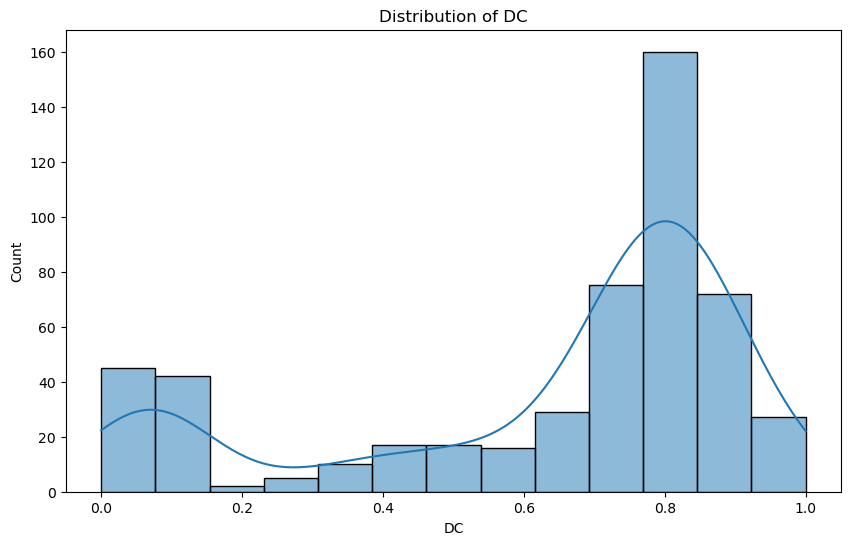

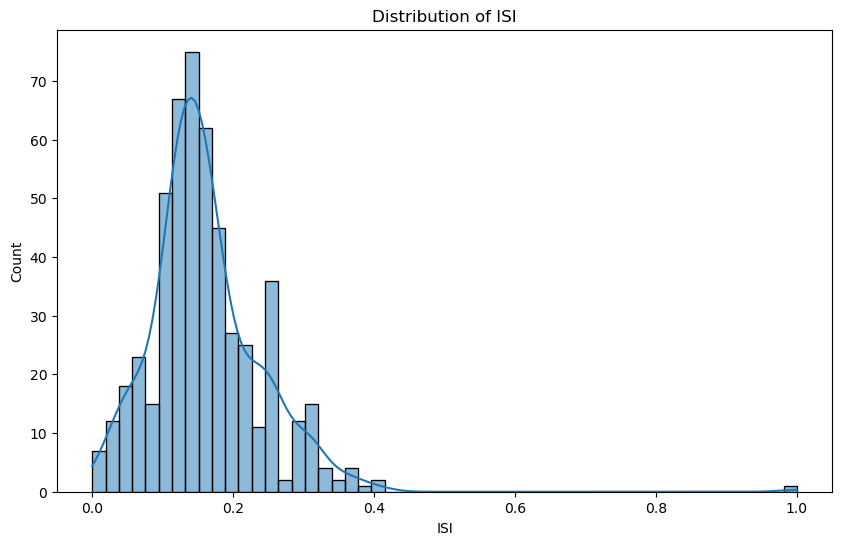

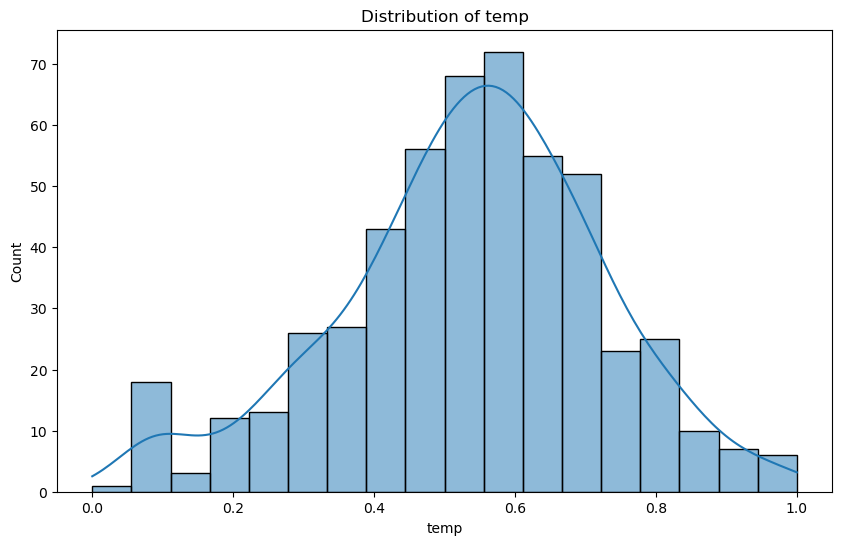

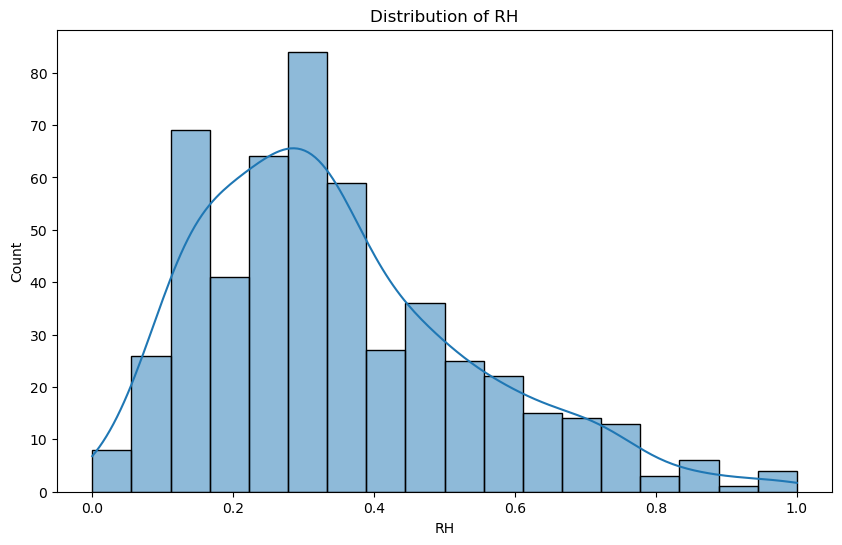

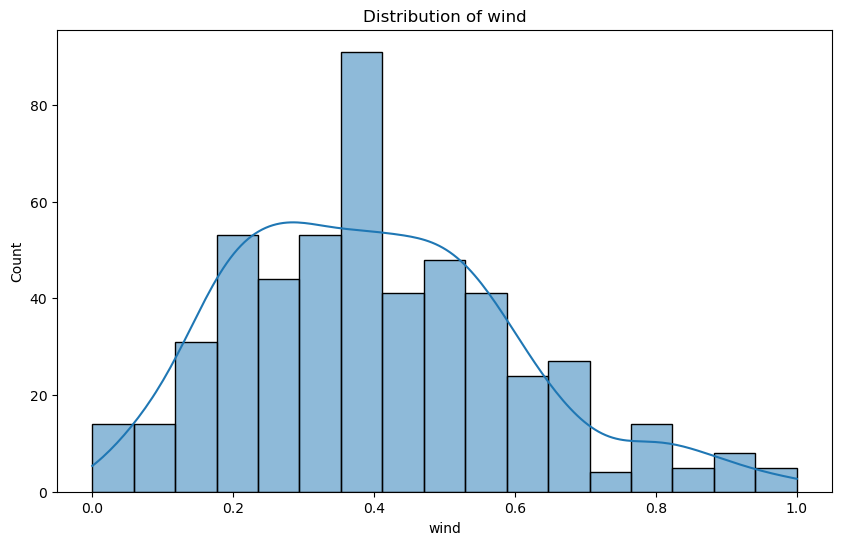

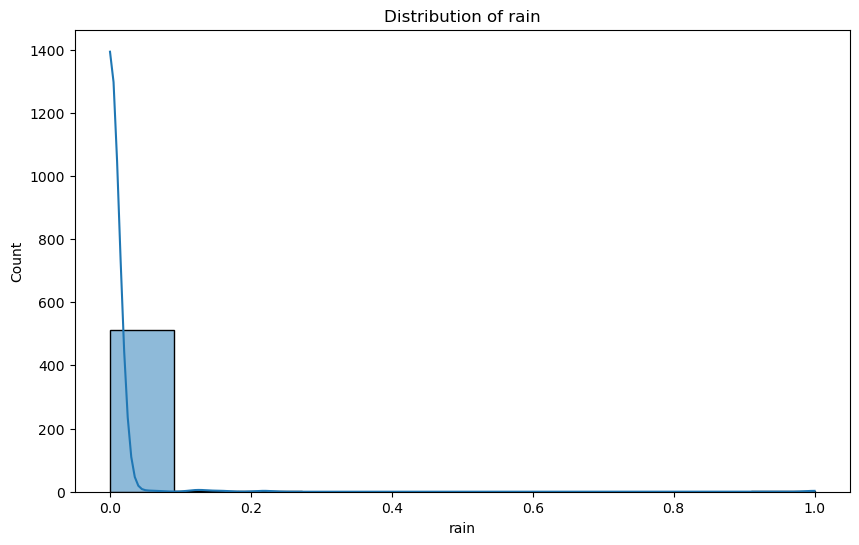

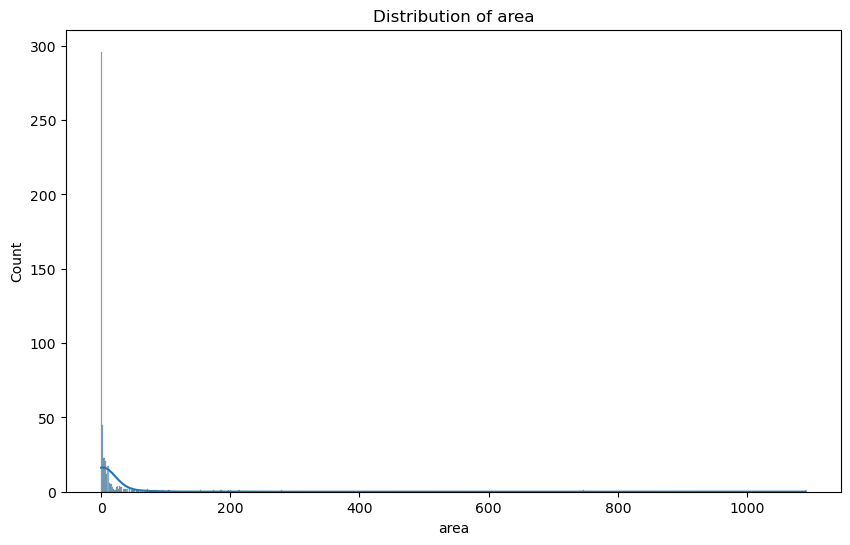

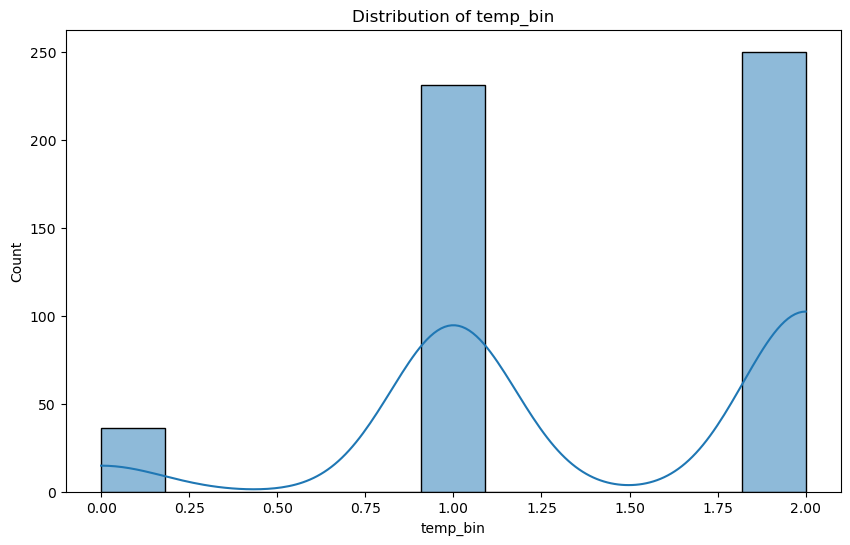

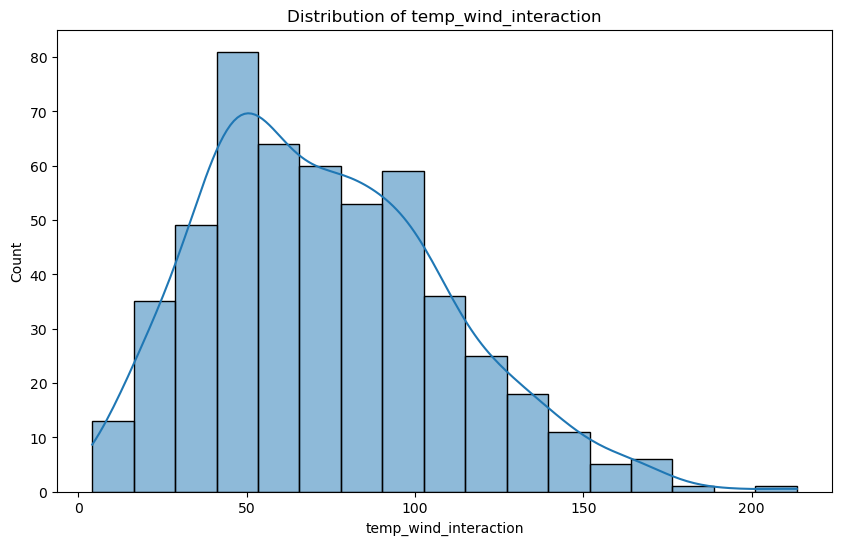

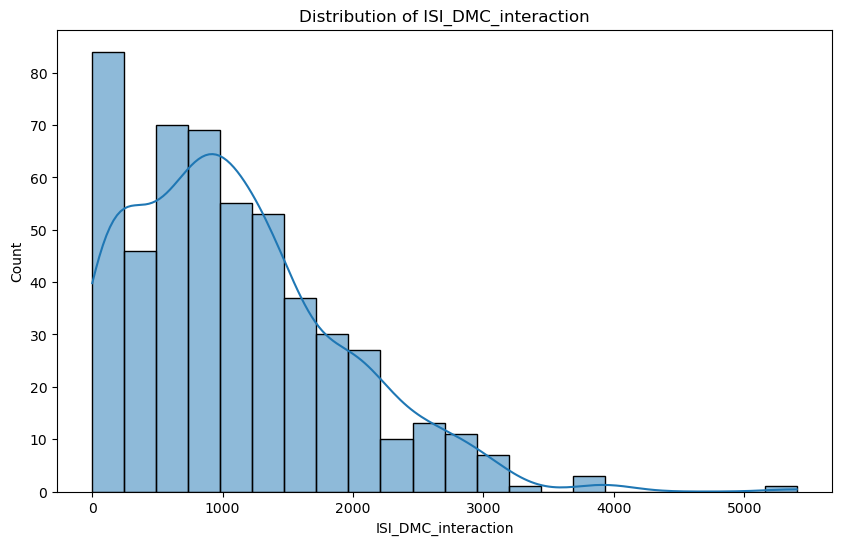

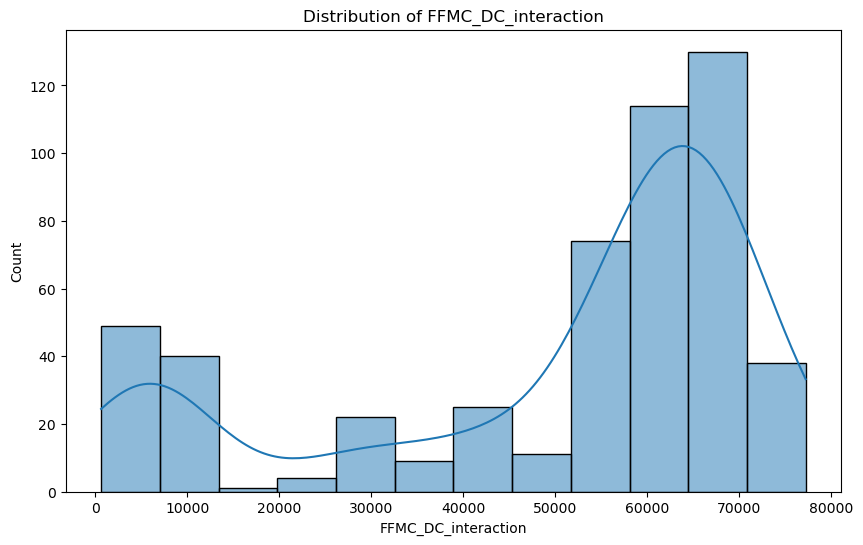

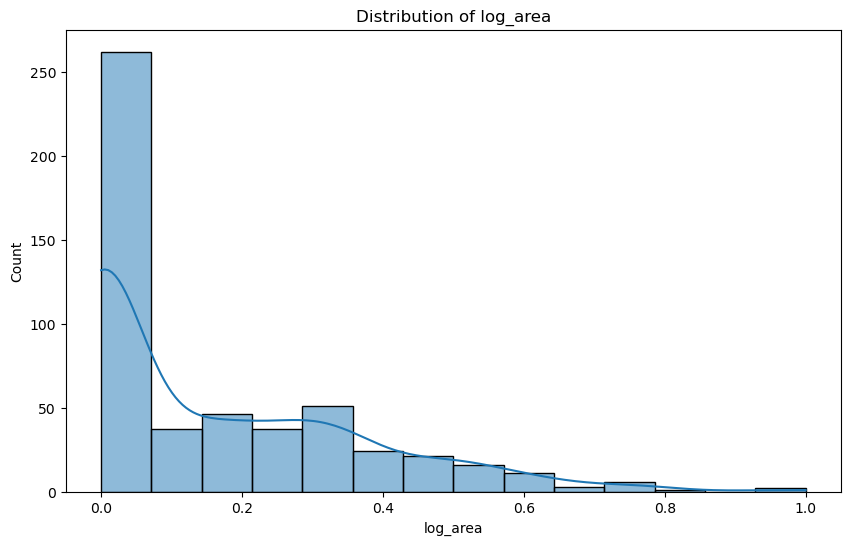

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

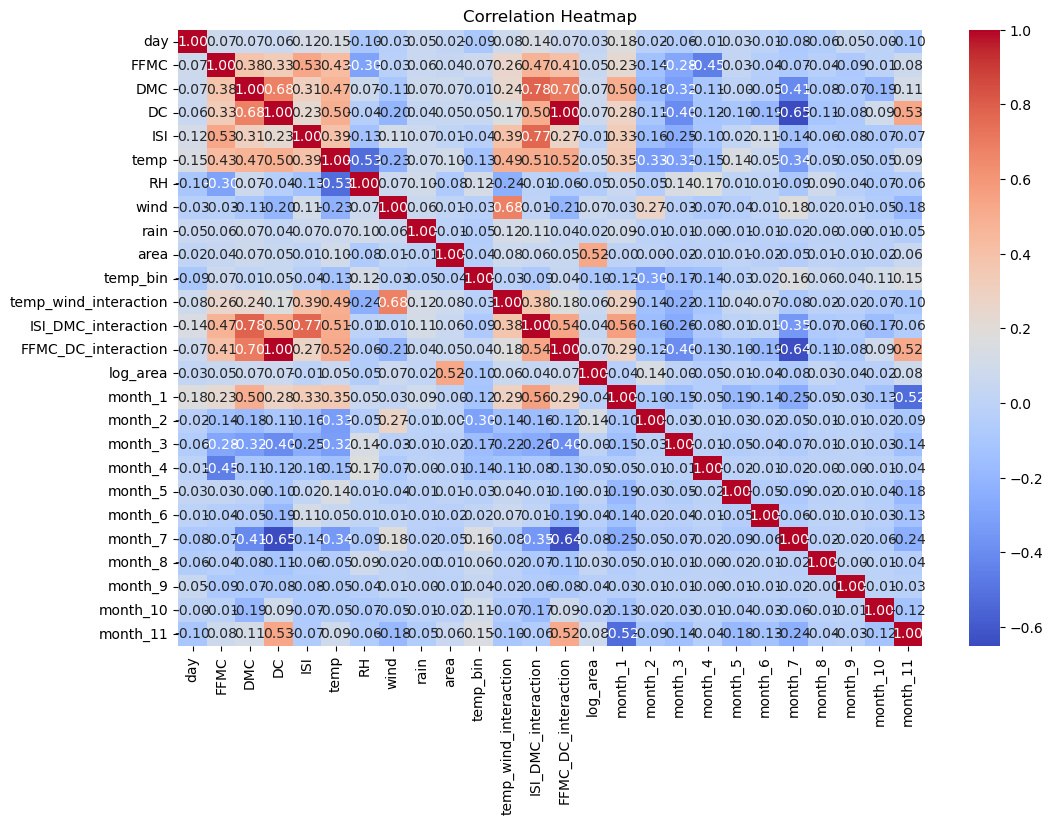

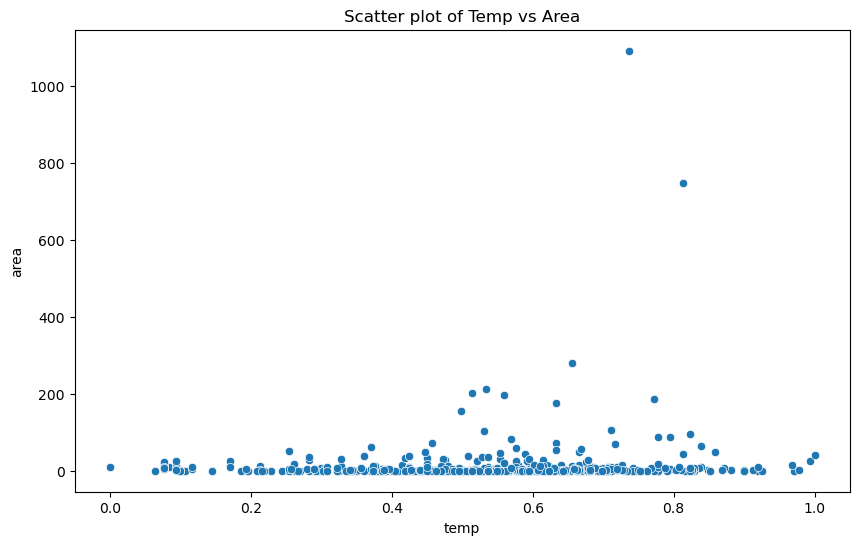

In [133]:
# Correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for numerical features vs target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='area')
plt.title('Scatter plot of Temp vs Area')
plt.show()

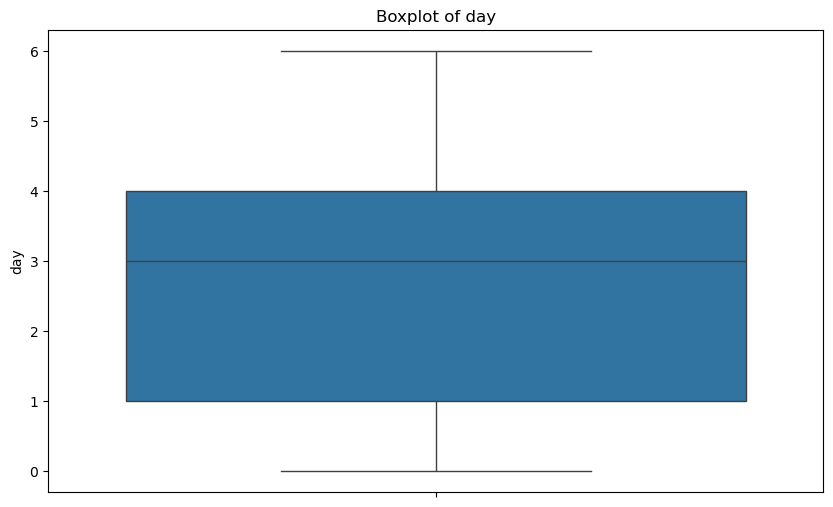

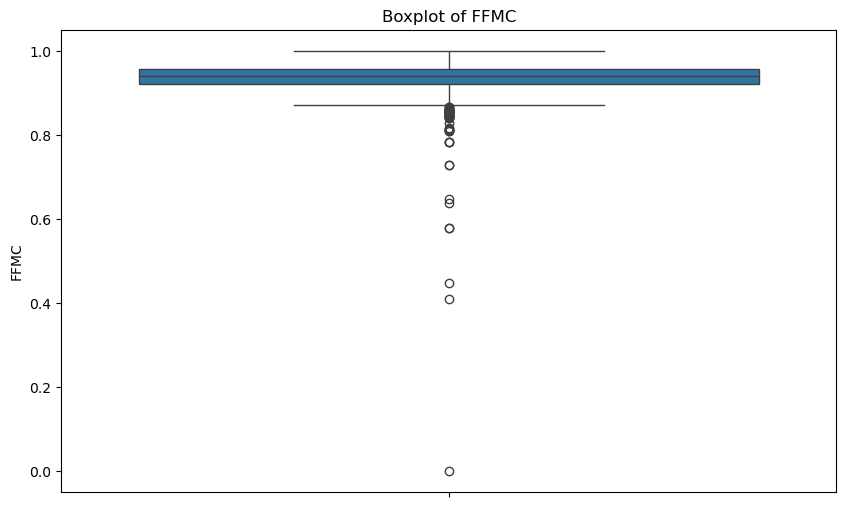

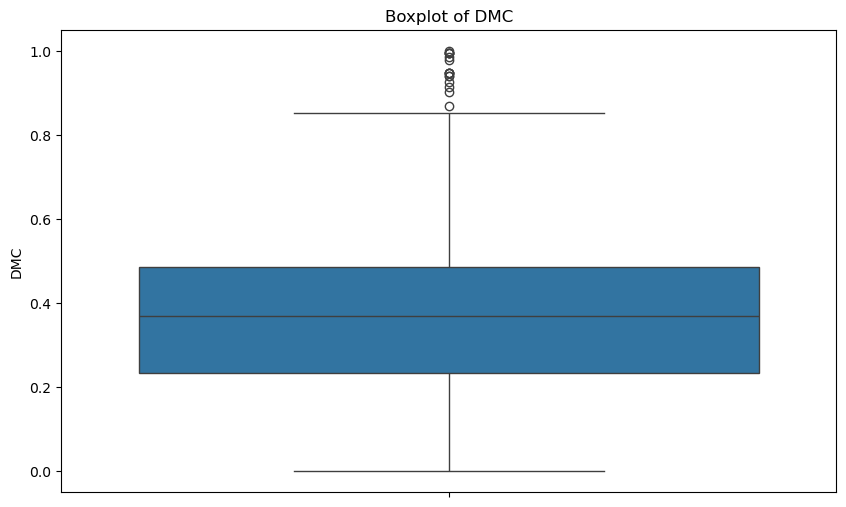

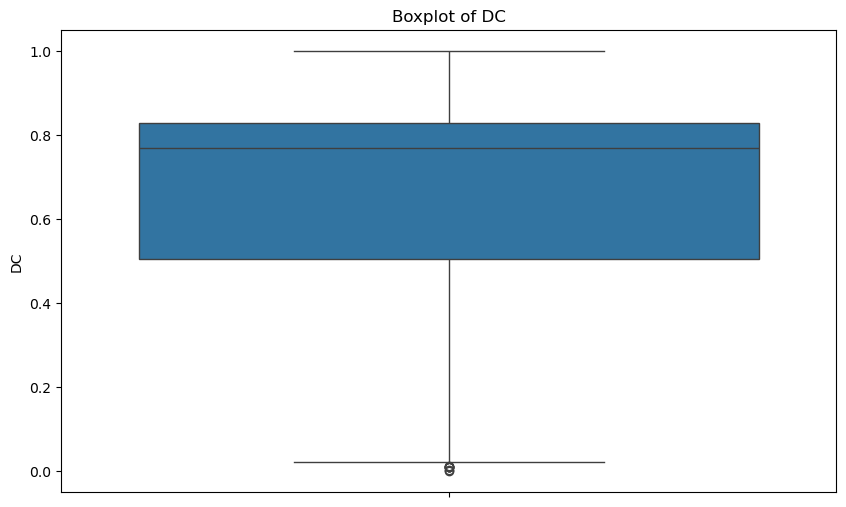

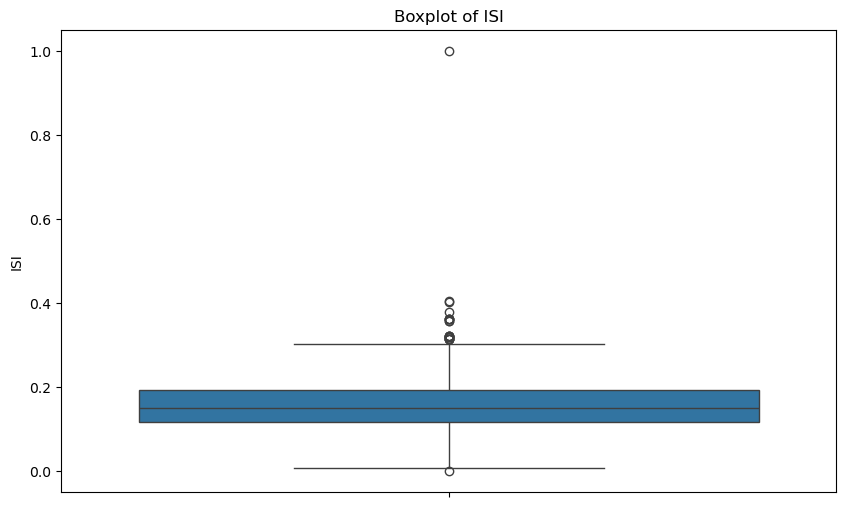

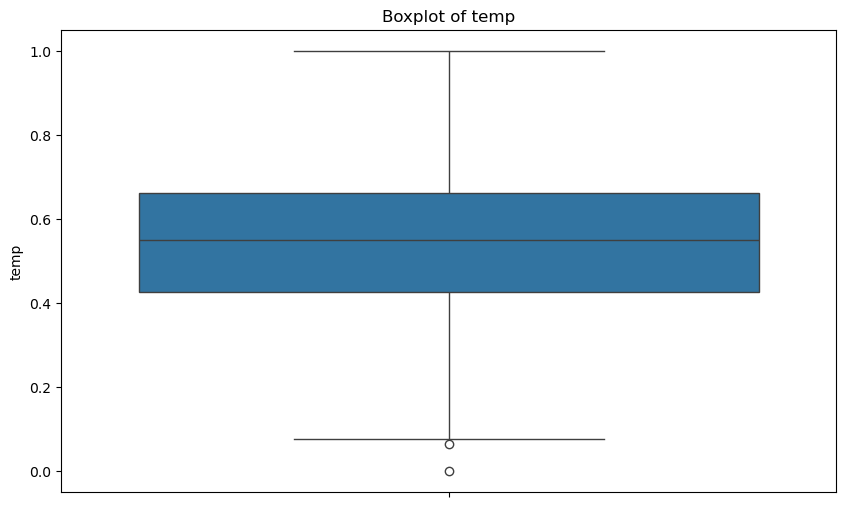

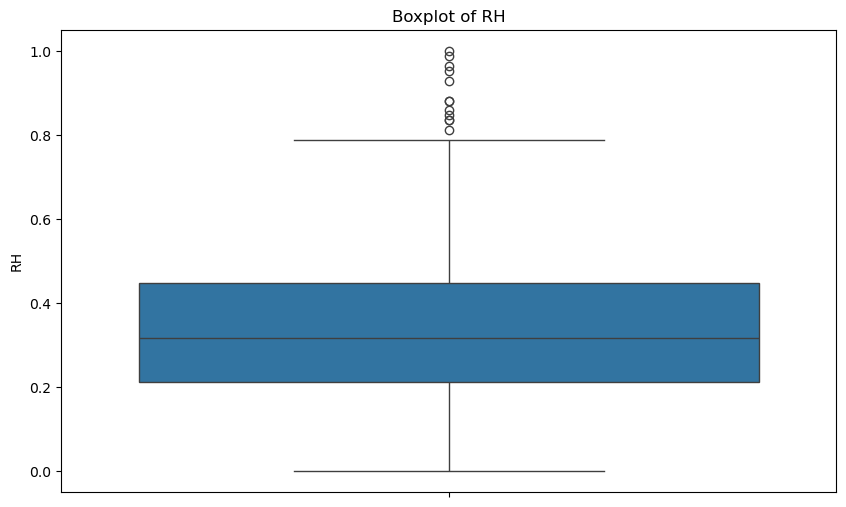

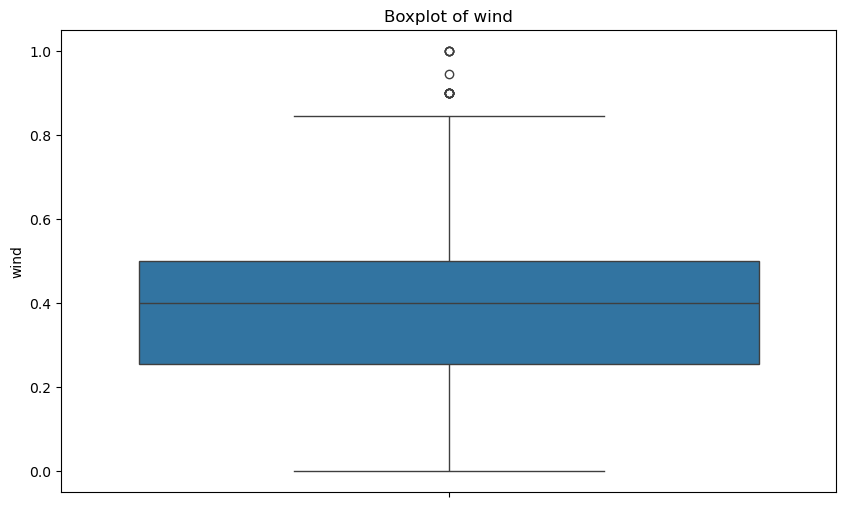

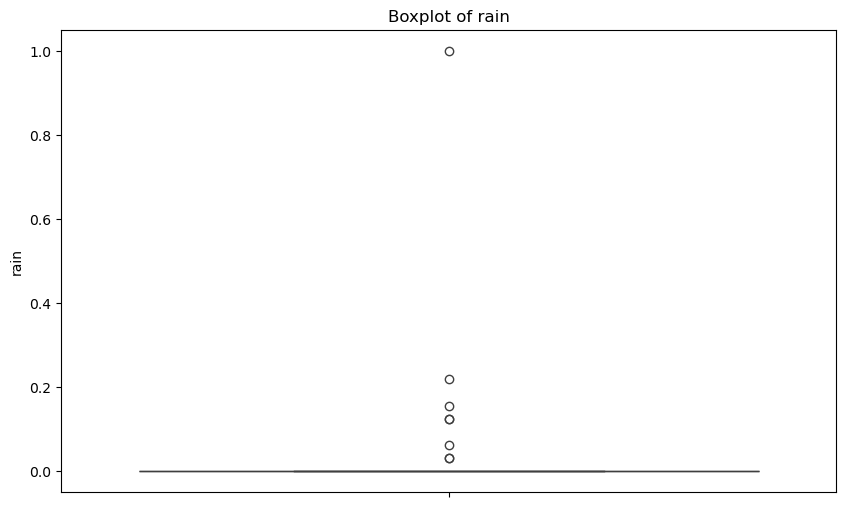

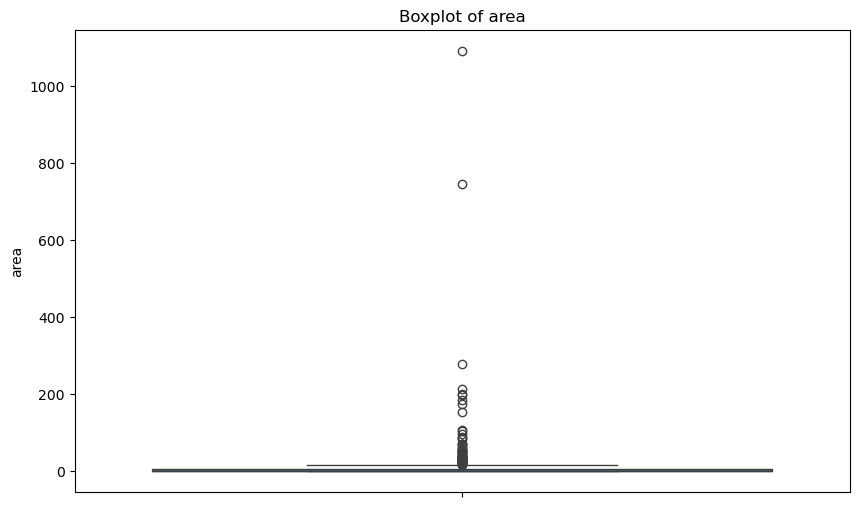

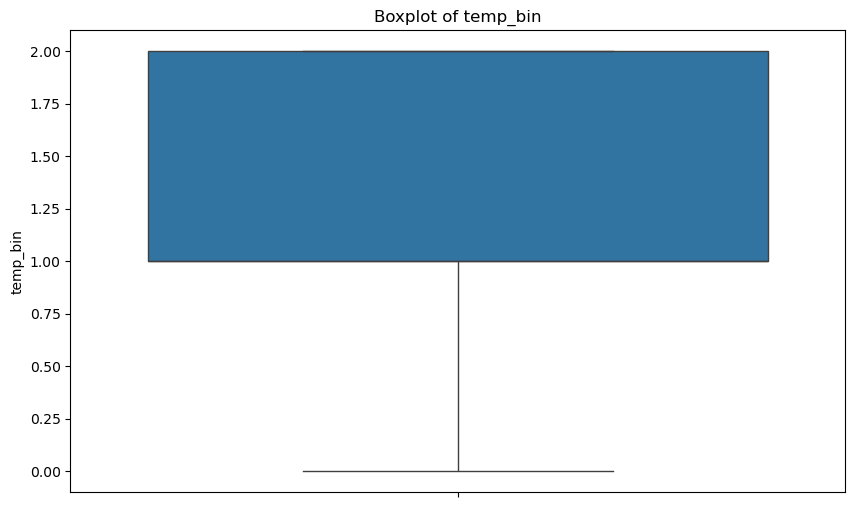

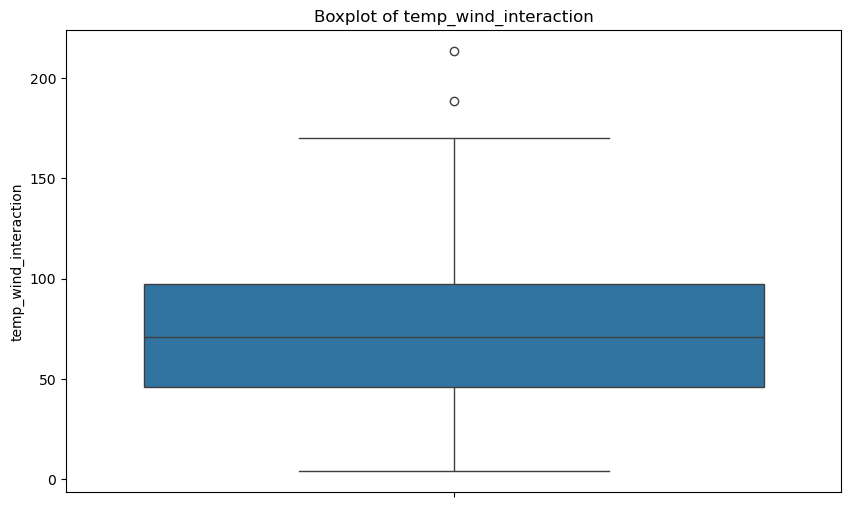

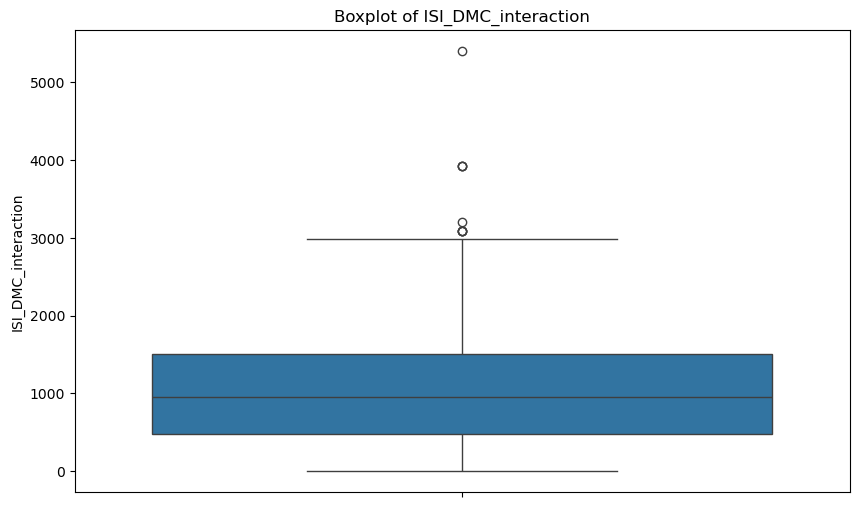

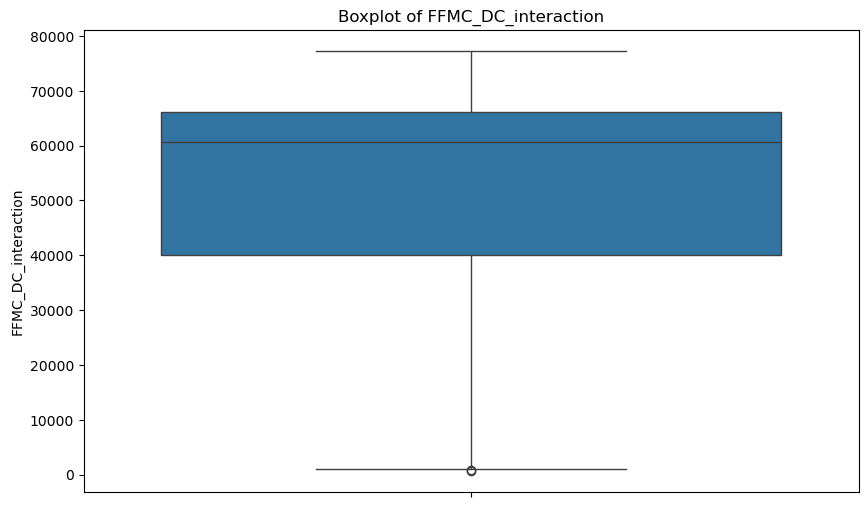

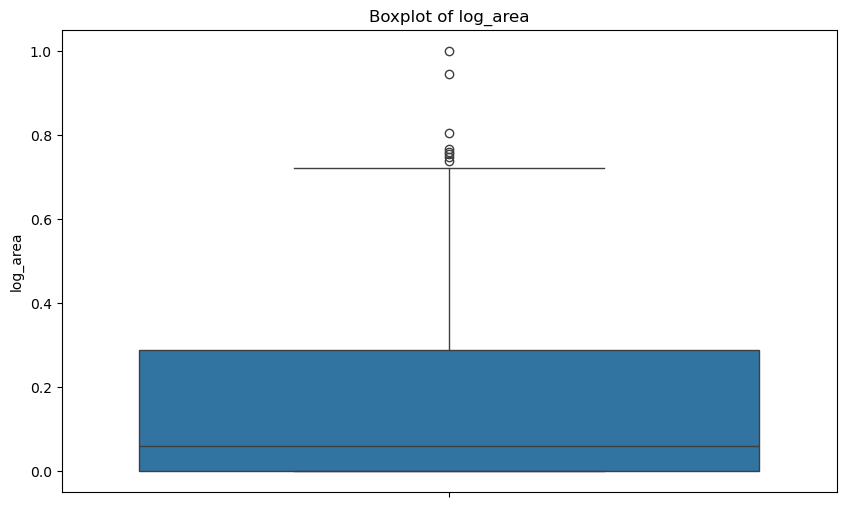

In [135]:
# Boxplot to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

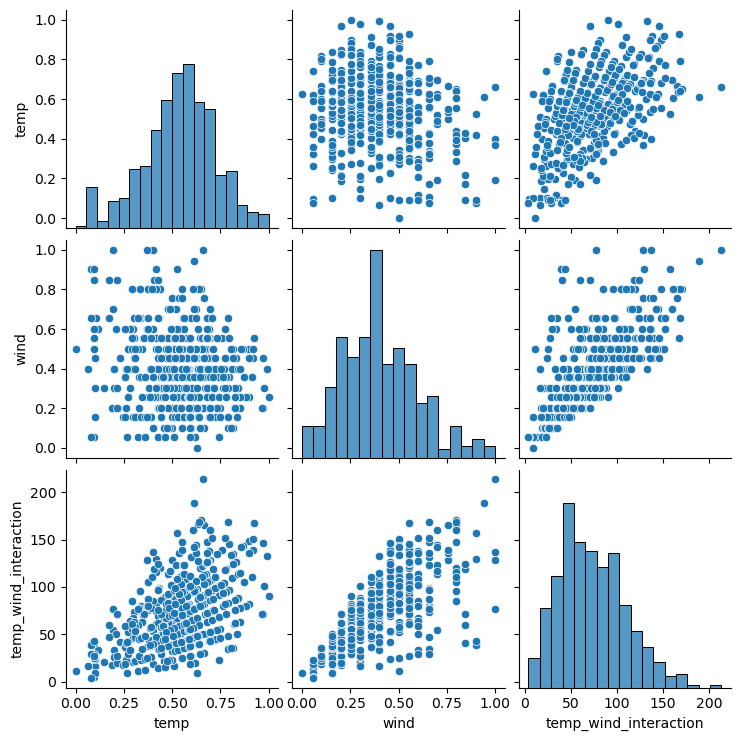

In [137]:
# Examine the interactions and new features like 'temp_wind_interaction'
sns.pairplot(df[['temp', 'wind', 'temp_wind_interaction']])
plt.show()

area                     1.000000
log_area                 0.524134
temp                     0.097844
temp_wind_interaction    0.082253
DMC                      0.072994
ISI_DMC_interaction      0.058308
month_11                 0.056573
FFMC_DC_interaction      0.052222
DC                       0.049383
FFMC                     0.040122
day                      0.018916
wind                     0.012317
ISI                      0.008258
month_8                  0.006264
month_5                  0.006149
month_2                  0.001010
month_1                 -0.004187
rain                    -0.007366
month_9                 -0.008893
month_4                 -0.012589
month_10                -0.016878
month_6                 -0.020314
month_3                 -0.020732
temp_bin                -0.039046
month_7                 -0.045596
RH                      -0.075519
Name: area, dtype: float64


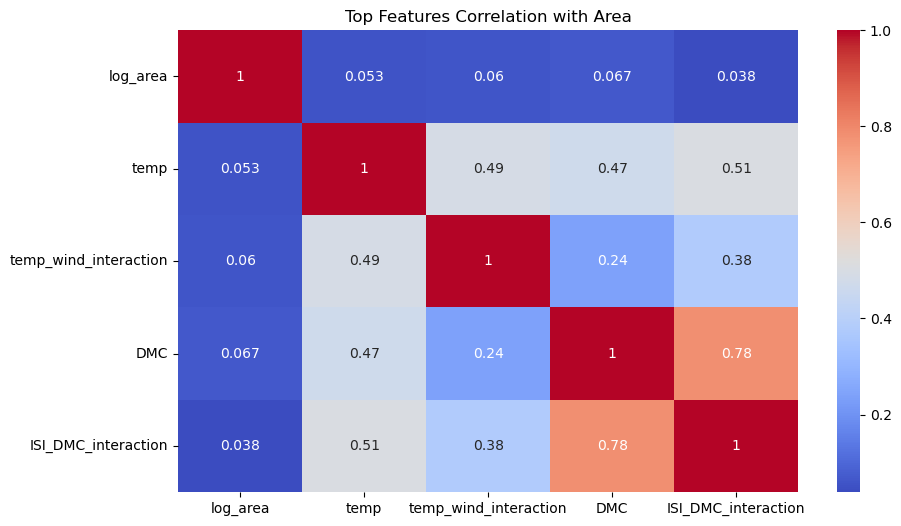

In [141]:
# Explore correlation between numerical features and target
correlations = df.corr()['area'].sort_values(ascending=False)
print(correlations)

# Visualizing top correlated features with target
top_features = correlations[1:6].index
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Features Correlation with Area')
plt.show()

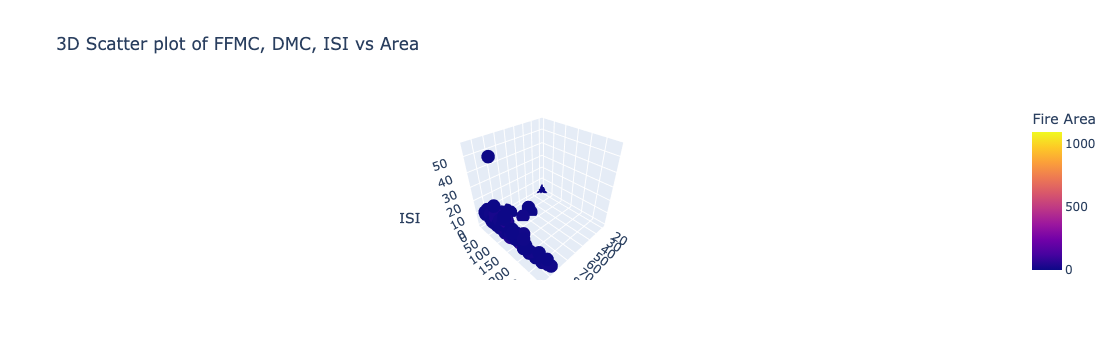

In [143]:
import plotly.express as px
import pandas as pd

# Load your data
df = pd.read_csv('/Users/tusharbhalerao/Downloads/forestfires.csv')

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='FFMC', y='DMC', z='ISI', color='area', 
                    title="3D Scatter plot of FFMC, DMC, ISI vs Area",
                    labels={'FFMC': 'FFMC', 'DMC': 'DMC', 'ISI': 'ISI', 'area': 'Fire Area'})

# Show the plot
fig.show()

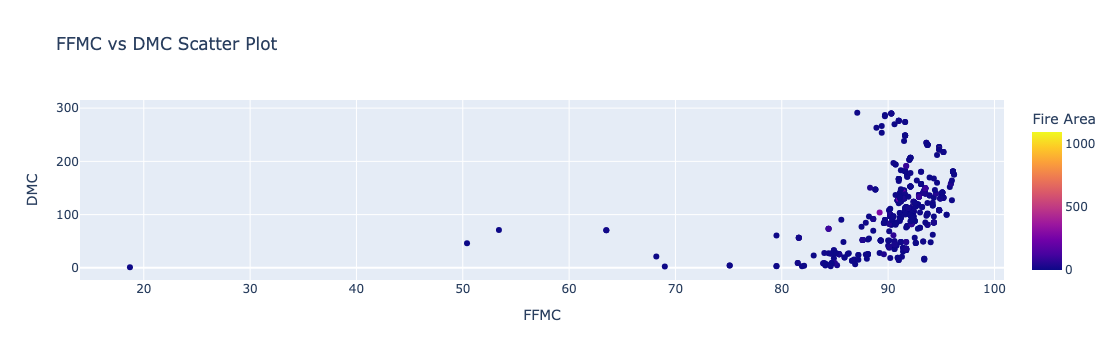

In [155]:
import plotly.express as px

# Interactive scatter plot of 'FFMC' vs 'DMC'
fig = px.scatter(df, x='FFMC', y='DMC', color='area',
                 title="FFMC vs DMC Scatter Plot", labels={'FFMC': 'FFMC', 'DMC': 'DMC', 'area': 'Fire Area'})
fig.show()

In [173]:
# Step 2: Handle missing values
print(df.isnull().sum())  # Check for missing values

# Impute numerical columns with the mean value
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values left
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
